
# Project: Investigate a Dataset - (TMDb MOVIES DATA)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about over 10,000 movies collected from the TMDb movies database. The database includes information like user ratings, budget, release_date, genre, revenue and other information about each movie.


### Question(s) for Analysis
- From this analysis we would see the most popupular movie category.
- We would also see if the runtime of a movie affects the budget of a movie.

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Checked for incorrect datatypes.

> Checked for NaN values.

> Checked for duplicates and also missing data.


In [2]:
# load dataset
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='cleaning'></a>
### Data Cleaning.

>Unwanted columns are dropped from the data set.

>Column with wrong datatype is changed.

>NaN values were dropped after dropping unwanted columns so as to have large amount of data remaining to perform the necessary analysis.
>Genre column was split to perform proper analysis.

In [6]:
# Drop unwanted columns
df.drop(df.columns[[6,7,9,10,11,14]],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
 13  budget_adj      10866 non-null  float64
 14  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


In [8]:
df["release_date"]= pd.to_datetime(df["release_date"])

In [9]:
df['month'] = df['release_date'].dt.month_name()

In [10]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June


In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10796 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10796 non-null  int64         
 1   imdb_id         10796 non-null  object        
 2   popularity      10796 non-null  float64       
 3   budget          10796 non-null  int64         
 4   revenue         10796 non-null  int64         
 5   original_title  10796 non-null  object        
 6   director        10796 non-null  object        
 7   runtime         10796 non-null  int64         
 8   genres          10796 non-null  object        
 9   release_date    10796 non-null  datetime64[ns]
 10  vote_count      10796 non-null  int64         
 11  vote_average    10796 non-null  float64       
 12  release_year    10796 non-null  int64         
 13  budget_adj      10796 non-null  float64       
 14  revenue_adj     10796 non-null  float64       
 15  mo

In [13]:
# Split the values in the genres column
df['genres'] = df['genres'].str.split('|')

In [14]:
# Add extra values for each list in the column so each list have the same number elements to aid further splitting
for g in df['genres']:
    if len(g) == 3:
        g.append('Nil')
    elif len(g) == 2:
        g.append('Nil')
        g.append('Nil')
    elif len(g) == 1:
        g.append('Nil')
        g.append('Nil')
        g.append('Nil')

In [15]:
# Values have been added
df['genres']

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2           [Adventure, Science Fiction, Thriller, Nil]
3         [Action, Adventure, Science Fiction, Fantasy]
4                        [Action, Crime, Thriller, Nil]
                              ...                      
10861                      [Documentary, Nil, Nil, Nil]
10862                   [Action, Adventure, Drama, Nil]
10863                       [Mystery, Comedy, Nil, Nil]
10864                        [Action, Comedy, Nil, Nil]
10865                           [Horror, Nil, Nil, Nil]
Name: genres, Length: 10796, dtype: object

In [16]:
df['genres'] = df['genres'].astype(str)

In [17]:
# Create another data frame
hb = df[df['genres'].str.contains(', ')]
hb.shape

(10796, 16)

In [18]:
# Copy the dataframe into 4 different frames
df1 = hb.copy()
df2 = hb.copy()
df3 = hb.copy()
df4 = hb.copy()

In [19]:
# column to split by ","
split_columns = ['genres']
# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split(", ")[0])
    df2[c] = df2[c].apply(lambda x: x.split(", ")[1])
    df3[c] = df3[c].apply(lambda x: x.split(", ")[2])
    df4[c] = df4[c].apply(lambda x: x.split(", ")[3])

In [20]:
# View Genres column for one of the dataframes created
df2['genres'].value_counts()

'Nil'                2311
'Drama'              1619
'Comedy'              987
'Thriller'            960
'Romance'             703
'Adventure'           622
'Action'              540
'Horror'              489
'Crime'               449
'Family'              445
'Science Fiction'     328
'Fantasy'             301
'Mystery'             238
'Animation'           205
'Music'               181
'History'             157
'Documentary'          75
'Foreign'              62
'War'                  53
'Western'              43
'TV Movie'             28
Name: genres, dtype: int64

In [21]:
new_rows = df1.append([df2,df3,df4])

In [22]:
# drop the original hybrid rows
df.drop(hb.index, inplace=True)

In [23]:
df

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month


In [24]:
# add in our newly separated rows
df = df.append(new_rows, ignore_index=True)

In [25]:
df

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,['Action',2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,['Action',2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,['Adventure',2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,['Action',2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,['Action',2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43179,21,tt0060371,0.080598,0,0,The Endless Summer,Bruce Brown,95,'Nil'],2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00,June
43180,20379,tt0060472,0.065543,0,0,Grand Prix,John Frankenheimer,176,'Nil'],2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00,December
43181,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,'Nil'],2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00,January
43182,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,'Nil'],2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00,November


In [26]:
df.shape

(43184, 16)

In [27]:
df.duplicated().sum()

2315

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

0

In [30]:
# To remove the preceding and ending square brackets and apostrophes for each element in the genres column
df['genres'] = df['genres'].map(lambda x: x.lstrip("['").rstrip("']"))

In [31]:
# Check that it has been removed
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40869 entries, 0 to 43183
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              40869 non-null  int64         
 1   imdb_id         40869 non-null  object        
 2   popularity      40869 non-null  float64       
 3   budget          40869 non-null  int64         
 4   revenue         40869 non-null  int64         
 5   original_title  40869 non-null  object        
 6   director        40869 non-null  object        
 7   runtime         40869 non-null  int64         
 8   genres          40869 non-null  object        
 9   release_date    40869 non-null  datetime64[ns]
 10  vote_count      40869 non-null  int64         
 11  vote_average    40869 non-null  float64       
 12  release_year    40869 non-null  int64         
 13  budget_adj      40869 non-null  float64       
 14  revenue_adj     40869 non-null  float64       
 15  mo

In [33]:
# Copy all rows with genre as 'Nil' into a data frame
db = df[df['genres'].str.contains('Nil')]

In [34]:
db.shape

(14561, 16)

In [35]:
# Drop the rows with Nil using their index from the main data frame df
df.drop(db.index, inplace=True)

In [36]:
df.shape

(26308, 16)

In [37]:
df['genres'].value_counts()

Drama              4733
Comedy             3767
Thriller           2784
Action             2363
Romance            1663
Horror             1625
Adventure          1450
Crime              1330
Family             1163
Science Fiction    1152
Fantasy             869
Mystery             772
Animation           687
Documentary         509
Music               388
History             328
War                 248
Foreign             175
Western             154
TV Movie            148
Name: genres, dtype: int64

In [38]:
# Check the genre column has succesfully been thoroughly splitted.
dfo = df[df['genres'] == 'Foreign']

In [39]:
dfo

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
1779,52034,tt1176416,0.203707,0,0,Tetsuo: The Bullet Man,Shinya Tsukamoto,71,Foreign,2009-09-05,11,5.3,2009,0.0,0.000000e+00,September
1883,24613,tt1185442,0.023254,0,0,Kurbaan,Renzil D'Silva,155,Foreign,2009-11-20,10,4.9,2009,0.0,0.000000e+00,November
2242,63727,tt1322306,0.229124,0,0,Exorcismus,Manuel Carballo,98,Foreign,2010-12-29,24,5.5,2010,0.0,0.000000e+00,December
2604,31524,tt0200087,0.015074,0,0,Sarfarosh,John Mathew Matthan,162,Foreign,1999-04-30,12,7.0,1999,0.0,0.000000e+00,April
3243,15011,tt1185264,0.152386,0,0,Red Mist,Paddy Breathnach,98,Foreign,2008-08-22,15,4.8,2008,0.0,0.000000e+00,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41499,31622,tt0120756,0.083297,0,0,Moby Dick,Franc Roddam,180,Foreign,1998-03-15,13,5.2,1998,0.0,0.000000e+00,March
41502,51216,tt0190419,0.029699,0,0,Ghulam,Vikram Bhatt,162,Foreign,1998-06-19,10,5.0,1998,0.0,0.000000e+00,June
42457,43020,tt0054756,0.113651,0,0,Il colosso di Rodi,Sergio Leone,127,Foreign,2061-06-16,17,5.3,1961,0.0,0.000000e+00,June
42682,17811,tt0106937,0.211198,0,2967668,Fong Sai Yuk juk jaap,Corey Yuen Kwai,95,Foreign,1993-07-30,13,6.1,1993,0.0,4.479606e+06,July


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26308 entries, 0 to 43177
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              26308 non-null  int64         
 1   imdb_id         26308 non-null  object        
 2   popularity      26308 non-null  float64       
 3   budget          26308 non-null  int64         
 4   revenue         26308 non-null  int64         
 5   original_title  26308 non-null  object        
 6   director        26308 non-null  object        
 7   runtime         26308 non-null  int64         
 8   genres          26308 non-null  object        
 9   release_date    26308 non-null  datetime64[ns]
 10  vote_count      26308 non-null  int64         
 11  vote_average    26308 non-null  float64       
 12  release_year    26308 non-null  int64         
 13  budget_adj      26308 non-null  float64       
 14  revenue_adj     26308 non-null  float64       
 15  mo

In [41]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26308.000000,26308.000000,2.630800e+04,2.630800e+04,26308.000000,26308.000000,26308.000000,26308.000000,2.630800e+04,2.630800e+04
mean,58942.393112,0.706472,1.736745e+07,4.716505e+07,102.874639,249.900144,5.955075,2000.718337,2.085722e+07,6.058688e+07
std,86966.609177,1.119654,3.440249e+07,1.320532e+08,29.639718,637.942421,0.911725,12.771715,3.796710e+07,1.614420e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10201.000000,0.225062,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18215.000000,0.411236,1.130000e+02,0.000000e+00,100.000000,44.000000,6.000000,2005.000000,2.035578e+02,0.000000e+00
75%,59108.000000,0.775669,2.000000e+07,3.047142e+07,112.000000,173.000000,6.600000,2011.000000,2.658418e+07,4.340022e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [42]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April


<a id='eda'></a>
## Exploratory Data Analysis
- We would address the questions we stated in the introductory section by using visualizations.

## Question 1: Is there a relationship beteween vote counts and popularity of movies?

In [43]:
def scatter_plot(variable1,variable2):
    df.plot(x = variable1, y = variable2, kind = 'scatter',figsize=(14,14),title=f'Scatter plot for {variable1.title()} and {variable2.title()}');

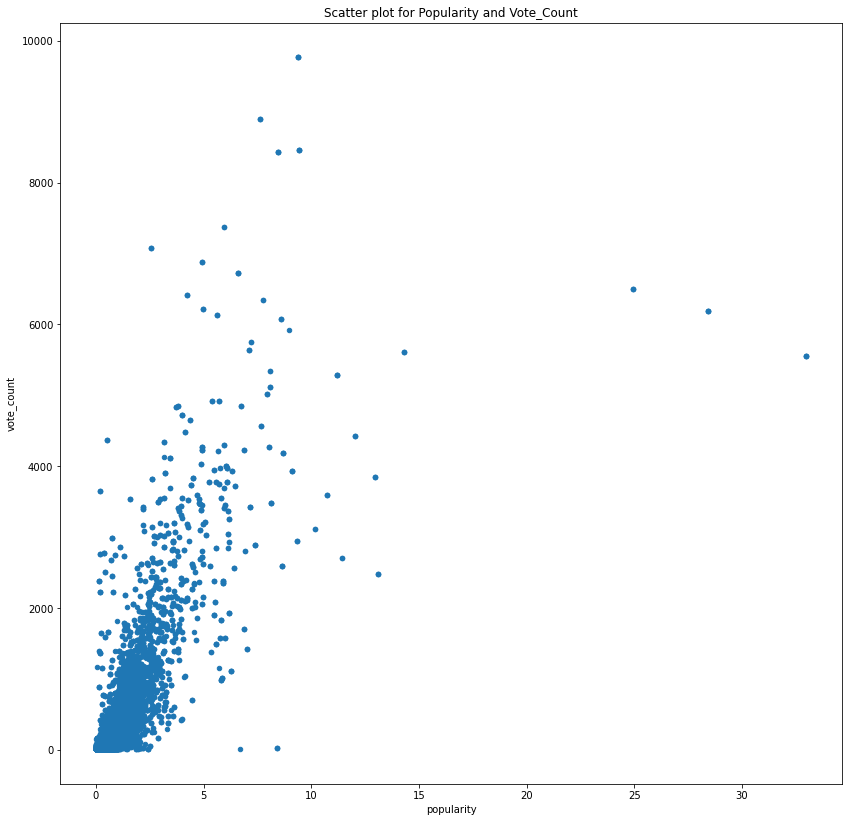

In [44]:
# 2D scatter plot for popularity and vote_count
scatter_plot('popularity','vote_count')

> The scatter plot shows there is a positive correlation beteween vote count and popularity.

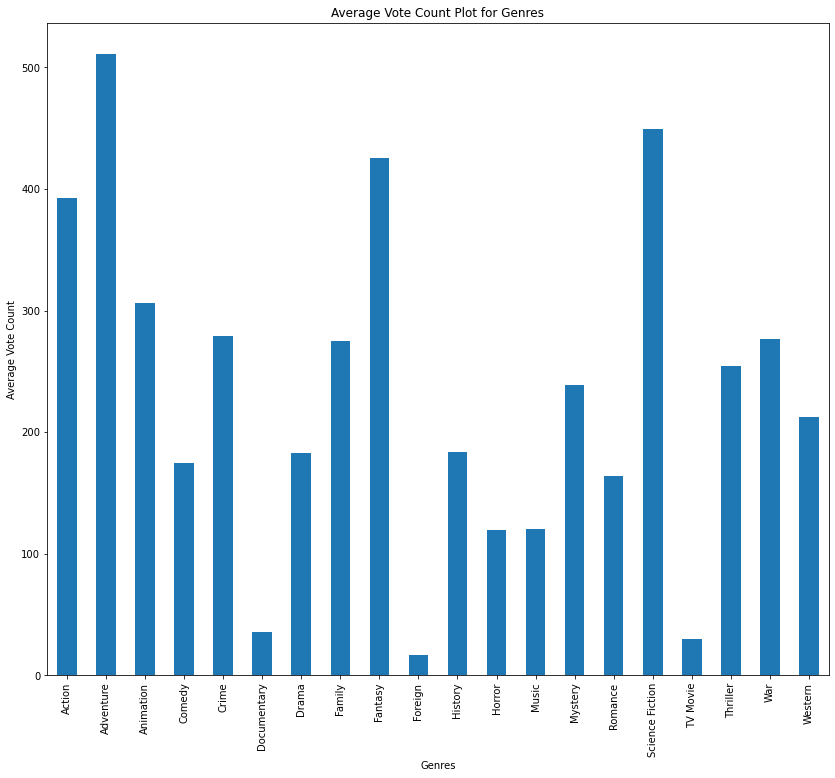

In [45]:
# 1d line plot for vote count
df.groupby('genres')['vote_count'].mean().plot(kind='bar',figsize=(14,12),ylabel="Average Vote Count",xlabel="Genres",title="Average Vote Count Plot for Genres");

> Average Vote_Count for the different movie genres.

## Question 2: Which genere is the most popular of all time?

In [46]:
def pie_chart_plot(variable):
    df[variable].value_counts().plot(kind='pie',figsize=(12,10))
    plt.title(f'Pie Chart Distibution for {variable.title()}.')
    plt.ylabel(variable.title())
    plt.legend(loc='upper right');

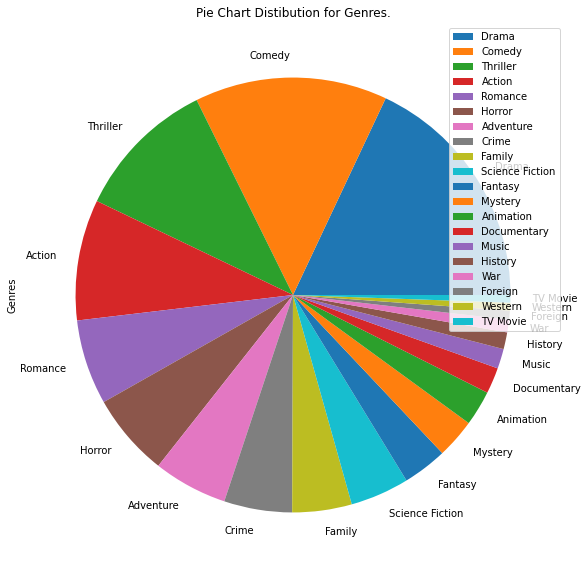

In [47]:
pie_chart_plot('genres')

> The pie chart shows **Drama** is the most popular kind of movie

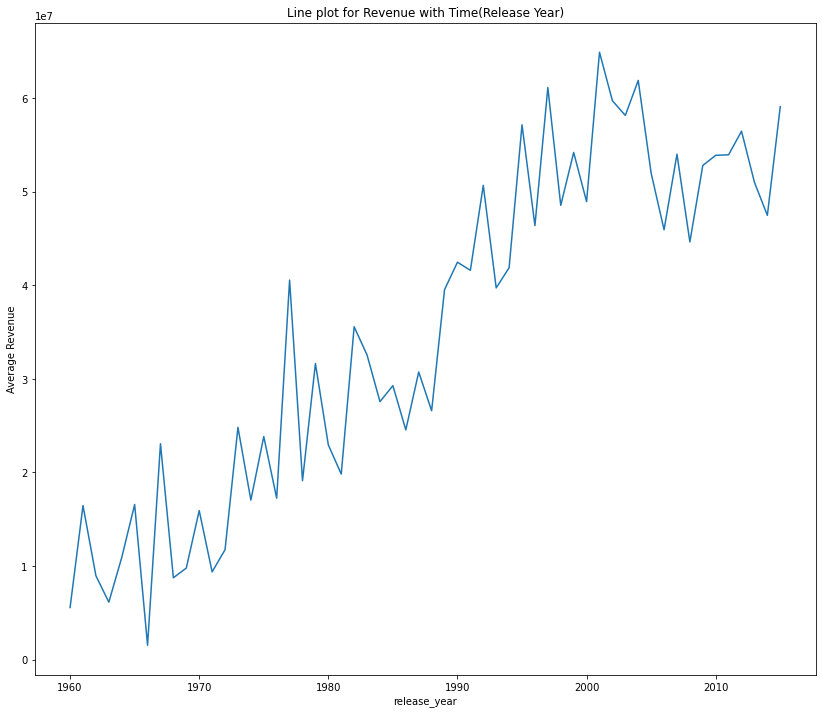

In [48]:
df.groupby('release_year')['revenue'].mean().plot(kind='line',figsize=(14,12),ylabel="Average Revenue",title="Line plot for Revenue with Time(Release Year)");

> Line plot showing revenue trend over time.

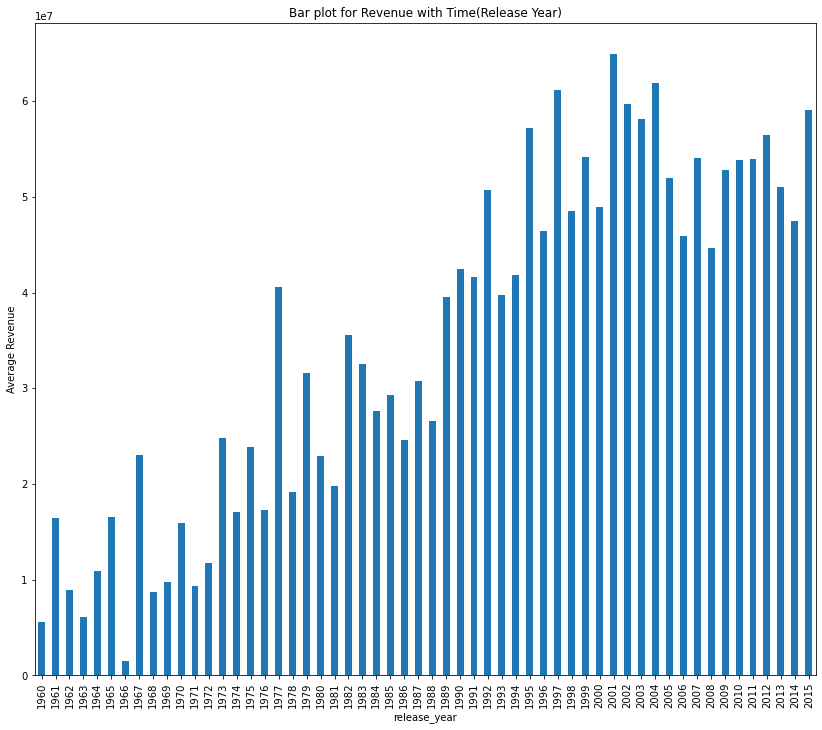

In [49]:
df.groupby('release_year')['revenue'].mean().plot(kind='bar',figsize=(14,12),ylabel="Average Revenue",title="Bar plot for Revenue with Time(Release Year)");

> Bar plot showing average revenue over time.

## Question 3: Is there a relationship between the runtime and budget of movies?

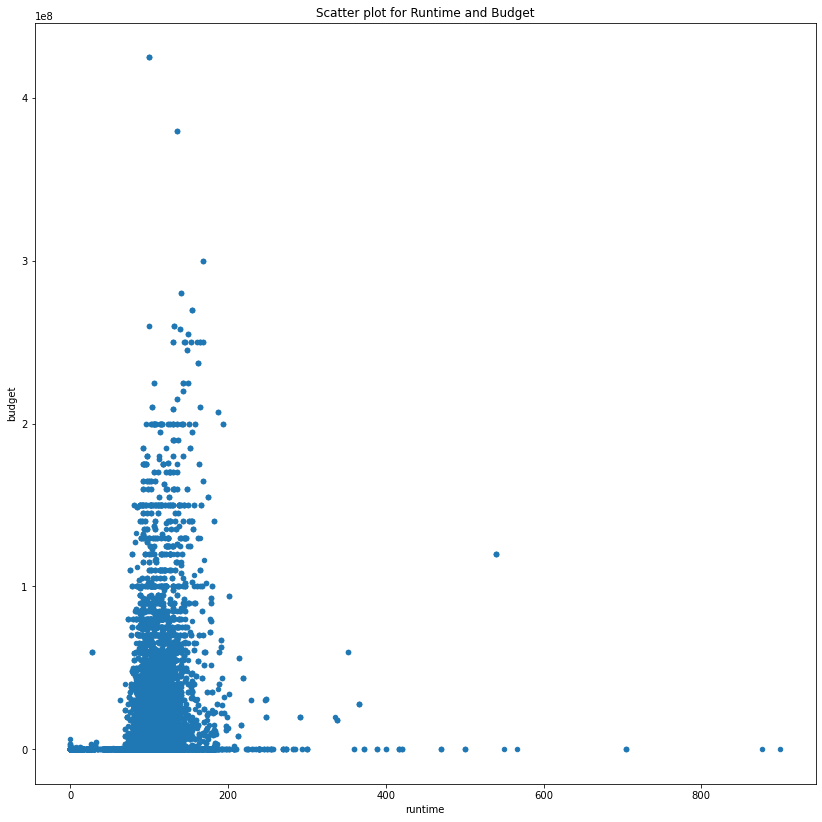

In [50]:
scatter_plot('runtime','budget')

> The scatter plot shows there is little or no correlation between runtime and budget of movies.

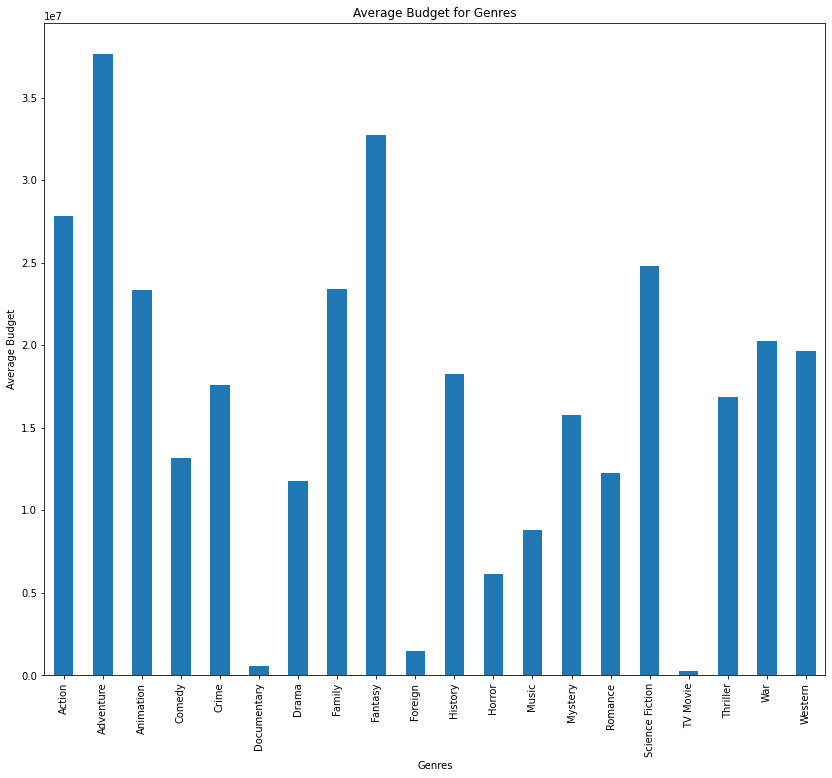

In [51]:
df.groupby('genres')['budget'].mean().plot(kind='bar',figsize=(14,12),ylabel="Average Budget",xlabel="Genres", title="Average Budget for Genres");

> Mean budget distribution for the different genres of movies

<a id='conclusions'></a>
## Conclusions
> From the visual analysis we have made above, we can make the following conclusions:
- For the period of years available on the data set , **Drama** is the most popular kind of movie and *TV Movie* is the least popular kind of movie.
- There is a positive correlation between the vote_count and popularity of a movie.
- There is little or no correlation between budget and runtime of movies.
- Revenue of movies seems to be increasing with time. 2001 was the year with highest revenue.
- It is observed that more money is spent in producing Adventure movies than any other kind of movie.
#### Limitations
* The categorical data in the dataframe is limited, making it difficult to perform more 2d visualizations with the categorical data.


### Additional Research
> Research can be done to check if the popularity of a movie is affected by a particular movie director.

> Further research can be done to check if movies released towards the end of a particular year generated more revenue than those that were released in the middle of that year.